**Data Loading**

In [1]:
import pandas as pd
import os

# Define data path
data_path = r'c:\Users\Jack\Desktop\GroupWork\Code&Data\Data\raw'

# 1. Load assessments dataset
assessments = pd.read_csv(os.path.join(data_path, 'assessments.csv'))
print(f"assessments: {assessments.shape[0]:,} rows x {assessments.shape[1]} columns")

# 2. Load courses dataset
courses = pd.read_csv(os.path.join(data_path, 'courses.csv'))
print(f"courses: {courses.shape[0]:,} rows x {courses.shape[1]} columns")

# 3. Load studentAssessment dataset
studentAssessment = pd.read_csv(os.path.join(data_path, 'studentAssessment.csv'))
print(f"studentAssessment: {studentAssessment.shape[0]:,} rows x {studentAssessment.shape[1]} columns")

# 4. Load studentInfo dataset
studentInfo = pd.read_csv(os.path.join(data_path, 'studentInfo.csv'))
print(f"studentInfo: {studentInfo.shape[0]:,} rows x {studentInfo.shape[1]} columns")

# 5. Load studentRegistration dataset
studentRegistration = pd.read_csv(os.path.join(data_path, 'studentRegistration.csv'))
print(f"studentRegistration: {studentRegistration.shape[0]:,} rows x {studentRegistration.shape[1]} columns")

# 6. Load studentVle dataset
studentVle = pd.read_csv(os.path.join(data_path, 'studentVle.csv'))
print(f"studentVle: {studentVle.shape[0]:,} rows x {studentVle.shape[1]} columns")

# 7. Load vle dataset
vle = pd.read_csv(os.path.join(data_path, 'vle.csv'))
print(f"vle: {vle.shape[0]:,} rows x {vle.shape[1]} columns")

# Summary
print("\nDataset Summary:")
print(f"  assessments        : {assessments.shape[0]:>10,} rows x {assessments.shape[1]} columns")
print(f"  courses            : {courses.shape[0]:>10,} rows x {courses.shape[1]} columns")
print(f"  studentAssessment  : {studentAssessment.shape[0]:>10,} rows x {studentAssessment.shape[1]} columns")
print(f"  studentInfo        : {studentInfo.shape[0]:>10,} rows x {studentInfo.shape[1]} columns")
print(f"  studentRegistration: {studentRegistration.shape[0]:>10,} rows x {studentRegistration.shape[1]} columns")
print(f"  studentVle         : {studentVle.shape[0]:>10,} rows x {studentVle.shape[1]} columns")
print(f"  vle                : {vle.shape[0]:>10,} rows x {vle.shape[1]} columns")

assessments: 206 rows x 6 columns
courses: 22 rows x 3 columns
studentAssessment: 173,912 rows x 5 columns
studentInfo: 32,593 rows x 12 columns
studentRegistration: 32,593 rows x 5 columns
studentVle: 10,655,280 rows x 6 columns
vle: 6,364 rows x 6 columns

Dataset Summary:
  assessments        :        206 rows x 6 columns
  courses            :         22 rows x 3 columns
  studentAssessment  :    173,912 rows x 5 columns
  studentInfo        :     32,593 rows x 12 columns
  studentRegistration:     32,593 rows x 5 columns
  studentVle         : 10,655,280 rows x 6 columns
  vle                :      6,364 rows x 6 columns


**Data Understanding for each dataset**

In [2]:
# assessments - Detailed Data Understanding
print("ASSESSMENTS - Detailed Data Understanding")

print(f"\n[1. Data Scale]")
print(f"  Rows: {assessments.shape[0]:,}")
print(f"  Columns: {assessments.shape[1]}")

print(f"\n[2. Column Names and Data Types]")
print(assessments.dtypes.to_string())

print(f"\n[3. First 5 Rows]")
display(assessments.head())

print(f"\n[4. Missing Value Analysis]")
missing = assessments.isnull().sum()
missing_pct = (missing / len(assessments) * 100).round(2)
if missing.sum() > 0:
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage %': missing_pct})
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("  No missing values")

print(f"\n[5. Numeric Column Statistics]")
numeric_cols = assessments.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 0:
    display(assessments[numeric_cols].describe().round(2))
else:
    print("  No numeric columns")

print(f"\n[6. Categorical Column Analysis]")
cat_cols = assessments.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"  {col}: {assessments[col].nunique()} unique values")
    if assessments[col].nunique() <= 10:
        print(f"    Distribution: {assessments[col].value_counts().to_dict()}")

print(f"\n[7. Data Quality Check]")
print(f"  Duplicate Rows: {assessments.duplicated().sum()}")
print(f"  Unique Assessments: {assessments['id_assessment'].nunique()}")
print(f"  Memory Usage: {assessments.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


ASSESSMENTS - Detailed Data Understanding

[1. Data Scale]
  Rows: 206
  Columns: 6

[2. Column Names and Data Types]
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64

[3. First 5 Rows]


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0



[4. Missing Value Analysis]


,Missing Count,Percentage %
date,11,5.34



[5. Numeric Column Statistics]


,id_assessment,date,weight
count,206.00,195.00,206.00
mean,26473.98,145.01,20.87
std,10098.63,76.00,30.38
min,1752.00,12.00,0.00
25%,15023.25,71.00,0.00
50%,25364.50,152.00,12.50
75%,34891.75,222.00,24.25
max,40088.00,261.00,100.00



[6. Categorical Column Analysis]
  code_module: 7 unique values
    Distribution: {'FFF': 52, 'BBB': 42, 'DDD': 35, 'GGG': 30, 'CCC': 20, 'EEE': 15, 'AAA': 12}
  code_presentation: 4 unique values
    Distribution: {'2014J': 57, '2014B': 57, '2013J': 53, '2013B': 39}
  assessment_type: 3 unique values
    Distribution: {'TMA': 106, 'CMA': 76, 'Exam': 24}

[7. Data Quality Check]
  Duplicate Rows: 0
  Unique Assessments: 206
  Memory Usage: 0.04 MB


### Data Understanding — 问题总结
**1. 完整性**

* `date` 缺失 11 条（5.34%）
  可能影响时序分析，建议填补而非删除

**2. 类型与语义**

* `date` 为 `float`，应为时间/天数 → 建议转 `int` 或 `datetime`
* `id_assessment` 为 ID，不应作为数值特征参与建模

**3. 数值异常**

* `weight` 存在大量 0（25% 分位数为 0）
  → 需确认是否合理或应视为缺失
* `weight` 最大值 100 合理，但需验证每门课程权重总和是否为 100

**4. 分布问题**

* `assessment_type` 不均衡（Exam 样本最少）
* `code_module` 各模块样本量差异较大

**5. 一致性风险**

建议检查：

* 每门课程是否都有 Exam
* 同一课程下权重总和是否为 100

In [3]:
# courses - Detailed Data Understanding
print("COURSES - Detailed Data Understanding")

print(f"\n[1. Data Scale]")
print(f"  Rows: {courses.shape[0]:,}")
print(f"  Columns: {courses.shape[1]}")

print(f"\n[2. Column Names and Data Types]")
print(courses.dtypes.to_string())

print(f"\n[3. First 5 Rows]")
display(courses.head())

print(f"\n[4. Missing Value Analysis]")
missing = courses.isnull().sum()
if missing.sum() > 0:
    missing_pct = (missing / len(courses) * 100).round(2)
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage %': missing_pct})
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("  No missing values")

print(f"\n[5. Numeric Column Statistics]")
numeric_cols = courses.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 0:
    display(courses[numeric_cols].describe().round(2))
else:
    print("  No numeric columns")

print(f"\n[6. Categorical Column Analysis]")
cat_cols = courses.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"  {col}: {courses[col].nunique()} unique values")
    if courses[col].nunique() <= 10:
        print(f"    Distribution: {courses[col].value_counts().to_dict()}")

print(f"\n[7. Data Quality Check]")
print(f"  Duplicate Rows: {courses.duplicated().sum()}")
print(f"  Memory Usage: {courses.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


COURSES - Detailed Data Understanding

[1. Data Scale]
  Rows: 22
  Columns: 3

[2. Column Names and Data Types]
code_module                   object
code_presentation             object
module_presentation_length     int64

[3. First 5 Rows]


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240



[4. Missing Value Analysis]
  No missing values

[5. Numeric Column Statistics]


,module_presentation_length
count,22.00
mean,255.55
std,13.65
min,234.00
25%,241.00
50%,261.50
75%,268.00
max,269.00



[6. Categorical Column Analysis]
  code_module: 7 unique values
    Distribution: {'BBB': 4, 'DDD': 4, 'FFF': 4, 'EEE': 3, 'GGG': 3, 'AAA': 2, 'CCC': 2}
  code_presentation: 4 unique values
    Distribution: {'2014J': 7, '2013J': 6, '2014B': 6, '2013B': 3}

[7. Data Quality Check]
  Duplicate Rows: 0
  Memory Usage: 0.00 MB


### Data Understanding — Courses 表问题总结

**1. 完整性**

* 无缺失值
  → 数据完整性良好

**2. 类型与语义**

* `module_presentation_length` 为数值型，语义合理
* `code_module`、`code_presentation` 为类别变量，类型正确

**3. 数值分布**

* 课程周期范围：234–269 天
* 标准差 13.65
  → 波动较小，无明显异常值

**4. 分布问题**

* 不同 module 数量分布不均（如 AAA、CCC 较少）
* 不同 presentation 数量略有差异（2013B 最少）

**5. 数据质量**

* 无重复值
* 结构清晰，可直接用于后续建模或关联分析


In [4]:
# studentAssessment - Detailed Data Understanding
print("STUDENTASSESSMENT - Detailed Data Understanding")

print(f"\n[1. Data Scale]")
print(f"  Rows: {studentAssessment.shape[0]:,}")
print(f"  Columns: {studentAssessment.shape[1]}")

print(f"\n[2. Column Names and Data Types]")
print(studentAssessment.dtypes.to_string())

print(f"\n[3. First 5 Rows]")
display(studentAssessment.head())

print(f"\n[4. Missing Value Analysis]")
missing = studentAssessment.isnull().sum()
missing_pct = (missing / len(studentAssessment) * 100).round(2)
if missing.sum() > 0:
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage %': missing_pct})
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("  No missing values")

print(f"\n[5. Numeric Column Statistics]")
numeric_cols = studentAssessment.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 0:
    display(studentAssessment[numeric_cols].describe().round(2))
else:
    print("  No numeric columns")

print(f"\n[6. Categorical Column Analysis]")
cat_cols = studentAssessment.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    for col in cat_cols:
        print(f"  {col}: {studentAssessment[col].nunique()} unique values")
else:
    print("  No categorical columns")

print(f"\n[7. Data Quality Check]")
print(f"  Duplicate Rows: {studentAssessment.duplicated().sum()}")
print(f"  Unique Students: {studentAssessment['id_student'].nunique():,}")
print(f"  Unique Assessments: {studentAssessment['id_assessment'].nunique()}")
print(f"  Memory Usage: {studentAssessment.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


STUDENTASSESSMENT - Detailed Data Understanding

[1. Data Scale]
  Rows: 173,912
  Columns: 5

[2. Column Names and Data Types]
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64

[3. First 5 Rows]


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0



[4. Missing Value Analysis]


,Missing Count,Percentage %
score,173,0.1



[5. Numeric Column Statistics]


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.00,173912.00,173912.00,173912.00,173739.0
mean,26553.80,705150.72,116.03,0.01,75.8
std,8829.78,552395.19,71.48,0.10,18.8
min,1752.00,6516.00,-11.00,0.00,0.0
25%,15022.00,504429.00,51.00,0.00,65.0
50%,25359.00,585208.00,116.00,0.00,80.0
75%,34883.00,634498.00,173.00,0.00,90.0
max,37443.00,2698588.00,608.00,1.00,100.0



[6. Categorical Column Analysis]
  No categorical columns

[7. Data Quality Check]
  Duplicate Rows: 0
  Unique Students: 23,369
  Unique Assessments: 188
  Memory Usage: 6.63 MB


### Data Understanding — StudentAssessment 表

**1. 完整性**

* `score` 缺失 173 条（0.1%）
  → 缺失比例极低，可直接删除或简单填补

**2. 类型与语义**

* `id_assessment`、`id_student` 为标识符
  → 不应作为连续数值特征
* `date_submitted` 为数值型时间变量
  → 建议明确单位（天数）后使用

**3. 数值异常**

* `date_submitted` 最小值为 **-11**
  → 存在异常（提前提交或数据错误）
* `score` 范围 0–100
  → 合理，但需关注 0 分是否为缺考或异常

**4. 分布特征**

* `is_banked` 几乎全为 0（均值 0.01）
  → 该特征信息量极低，建模价值有限

**5. 数据质量**

* 无重复记录
* 学生数：23,369
* assessment 数：188
* 数据规模较大，适合做统计与建模分析

In [5]:
# studentInfo - Detailed Data Understanding
print("STUDENTINFO - Detailed Data Understanding")

print(f"\n[1. Data Scale]")
print(f"  Rows: {studentInfo.shape[0]:,}")
print(f"  Columns: {studentInfo.shape[1]}")

print(f"\n[2. Column Names and Data Types]")
print(studentInfo.dtypes.to_string())

print(f"\n[3. First 5 Rows]")
display(studentInfo.head())

print(f"\n[4. Missing Value Analysis]")
missing = studentInfo.isnull().sum()
missing_pct = (missing / len(studentInfo) * 100).round(2)
if missing.sum() > 0:
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage %': missing_pct})
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("  No missing values")

print(f"\n[5. Numeric Column Statistics]")
numeric_cols = studentInfo.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 0:
    display(studentInfo[numeric_cols].describe().round(2))
else:
    print("  No numeric columns")

print(f"\n[6. Categorical Column Analysis]")
cat_cols = studentInfo.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"  {col}: {studentInfo[col].nunique()} unique values")
    if studentInfo[col].nunique() <= 10:
        print(f"    Distribution: {studentInfo[col].value_counts().to_dict()}")

print(f"\n[7. Data Quality Check]")
print(f"  Duplicate Rows: {studentInfo.duplicated().sum()}")
print(f"  Unique Students: {studentInfo['id_student'].nunique():,}")
print(f"  Memory Usage: {studentInfo.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


STUDENTINFO - Detailed Data Understanding

[1. Data Scale]
  Rows: 32,593
  Columns: 12

[2. Column Names and Data Types]
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object

[3. First 5 Rows]


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass



[4. Missing Value Analysis]


,Missing Count,Percentage %
imd_band,1111,3.41



[5. Numeric Column Statistics]


,id_student,num_of_prev_attempts,studied_credits
count,32593.00,32593.00,32593.00
mean,706687.67,0.16,79.76
std,549167.31,0.48,41.07
min,3733.00,0.00,30.00
25%,508573.00,0.00,60.00
50%,590310.00,0.00,60.00
75%,644453.00,0.00,120.00
max,2716795.00,6.00,655.00



[6. Categorical Column Analysis]
  code_module: 7 unique values
    Distribution: {'BBB': 7909, 'FFF': 7762, 'DDD': 6272, 'CCC': 4434, 'EEE': 2934, 'GGG': 2534, 'AAA': 748}
  code_presentation: 4 unique values
    Distribution: {'2014J': 11260, '2013J': 8845, '2014B': 7804, '2013B': 4684}
  gender: 2 unique values
    Distribution: {'M': 17875, 'F': 14718}
  region: 13 unique values
  highest_education: 5 unique values
    Distribution: {'A Level or Equivalent': 14045, 'Lower Than A Level': 13158, 'HE Qualification': 4730, 'No Formal quals': 347, 'Post Graduate Qualification': 313}
  imd_band: 10 unique values
    Distribution: {'20-30%': 3654, '30-40%': 3539, '10-20': 3516, '0-10%': 3311, '40-50%': 3256, '50-60%': 3124, '60-70%': 2905, '70-80%': 2879, '80-90%': 2762, '90-100%': 2536}
  age_band: 3 unique values
    Distribution: {'0-35': 22944, '35-55': 9433, '55<=': 216}
  disability: 2 unique values
    Distribution: {'N': 29429, 'Y': 3164}
  final_result: 4 unique values
    Distr

### Data Understanding — StudentInfo 表问题总结

**1. 完整性（Completeness）**

* `imd_band` 存在缺失：1111 条（3.41%）
  → 建议将缺失作为单独类别（`Unknown`），避免信息损失

**2. 类型与语义（Validity）**

* `id_student` 为标识符
  → 不应作为数值特征
* 其余字段类型与语义基本一致

**3. 数值字段问题（Numeric）**

* `num_of_prev_attempts` 极度偏斜（75% 为 0）
  → 可能需离散化（0 vs ≥1）
* `studied_credits` 存在极端值（最大 655）
  → 需检查是否为异常或跨课程累积

**4. 分布问题（整体层面）**

* module 与 presentation 分布不均
  → 课程与批次效应可能干扰分析

**5. 数据质量**

* 无重复记录
* 数据规模充足，适合建模分析


**6. 类别变量专项总结（Categorical-focused）**

**核心结论：多个类别字段存在“长尾 + 不均衡 + 高基数”问题，直接 one-hot 可能引入噪声与不稳定性。**

### 主要风险点

* 极小类别（不稳定）：

  * `AAA` module
  * `55<=` age_band
  * `Post Graduate` / `No Formal quals`
  * `Distinction`
* 明显不均衡：

  * `final_result`
  * `disability`
  * `age_band`
* 高基数：

  * `region`（13 类）
  * `imd_band`（10 类）

### 建议处理策略

* 合并长尾类别 → Other
* 小样本类别在报告中明确说明局限性
* 建模时使用 class weight 或分层采样
* `imd_band` 缺失单独建类
* 检查 `region`、`imd_band`、`highest_education` 的相关性，防止信息冗余

In [6]:
# studentRegistration - Detailed Data Understanding
print("STUDENTREGISTRATION - Detailed Data Understanding")

print(f"\n[1. Data Scale]")
print(f"  Rows: {studentRegistration.shape[0]:,}")
print(f"  Columns: {studentRegistration.shape[1]}")

print(f"\n[2. Column Names and Data Types]")
print(studentRegistration.dtypes.to_string())

print(f"\n[3. First 5 Rows]")
display(studentRegistration.head())

print(f"\n[4. Missing Value Analysis]")
missing = studentRegistration.isnull().sum()
missing_pct = (missing / len(studentRegistration) * 100).round(2)
if missing.sum() > 0:
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage %': missing_pct})
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("  No missing values")

print(f"\n[5. Numeric Column Statistics]")
numeric_cols = studentRegistration.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 0:
    display(studentRegistration[numeric_cols].describe().round(2))
else:
    print("  No numeric columns")

print(f"\n[6. Categorical Column Analysis]")
cat_cols = studentRegistration.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"  {col}: {studentRegistration[col].nunique()} unique values")
    if studentRegistration[col].nunique() <= 10:
        print(f"    Distribution: {studentRegistration[col].value_counts().to_dict()}")

print(f"\n[7. Data Quality Check]")
print(f"  Duplicate Rows: {studentRegistration.duplicated().sum()}")
print(f"  Unique Students: {studentRegistration['id_student'].nunique():,}")
print(f"  Memory Usage: {studentRegistration.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


STUDENTREGISTRATION - Detailed Data Understanding

[1. Data Scale]
  Rows: 32,593
  Columns: 5

[2. Column Names and Data Types]
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64

[3. First 5 Rows]


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN



[4. Missing Value Analysis]


,Missing Count,Percentage %
date_registration,45,0.14
date_unregistration,22521,69.10



[5. Numeric Column Statistics]


,id_student,date_registration,date_unregistration
count,32593.00,32548.00,10072.00
mean,706687.67,-69.41,49.76
std,549167.31,49.26,82.46
min,3733.00,-322.00,-365.00
25%,508573.00,-100.00,-2.00
50%,590310.00,-57.00,27.00
75%,644453.00,-29.00,109.00
max,2716795.00,167.00,444.00



[6. Categorical Column Analysis]
  code_module: 7 unique values
    Distribution: {'BBB': 7909, 'FFF': 7762, 'DDD': 6272, 'CCC': 4434, 'EEE': 2934, 'GGG': 2534, 'AAA': 748}
  code_presentation: 4 unique values
    Distribution: {'2014J': 11260, '2013J': 8845, '2014B': 7804, '2013B': 4684}

[7. Data Quality Check]
  Duplicate Rows: 0
  Unique Students: 28,785
  Memory Usage: 4.04 MB


### Data Understanding — StudentRegistration 表问题总结

**1. 完整性（Completeness）**

* `date_registration` 缺失 45 条（0.14%）
  → 比例极低，可直接删除或简单填补
* `date_unregistration` 缺失 **69.10%**
  → 很可能代表“未退课学生”，属于**有业务含义的缺失**，不应简单填补

**2. 类型与语义（Validity）**

* `id_student` 为标识符
  → 不作为数值特征
* `date_registration` / `date_unregistration` 为时间变量
  → 建议后续转为相对天数差或持续时间特征

**3. 数值异常与逻辑问题（Critical）**

* `date_registration` 大量为负数（min = -322）
  → 表示在课程开始前注册，语义合理
* `date_unregistration` 存在负值（min = -365）
  → 表示课程开始前即退课，需要确认是否合理
* `date_unregistration` 最大值 444
  → 存在非常晚退课行为，可能为异常或延迟记录

> 这一表最重要的问题：**时间变量的业务解释必须明确，否则后续特征工程会出错。**

**4. 分布问题**

* module 与 presentation 分布仍然不均
  → 与 StudentInfo 表一致，说明不是抽样问题而是原始结构如此

**5. 数据质量**

* 无重复记录
* 28,785 名唯一学生
* 数据规模良好，可与 StudentInfo / Assessment 关联建模

**核心结论**

> StudentRegistration 最大风险不在“缺失”，而在于**时间变量的业务语义与边界合理性需要验证**。
> 它是后续构建「注册时长」「是否提前退课」「学习坚持度」等核心特征的关键数据源。

In [7]:
# studentVle - Detailed Data Understanding
print("STUDENTVLE - Detailed Data Understanding")

print(f"\n[1. Data Scale]")
print(f"  Rows: {studentVle.shape[0]:,}")
print(f"  Columns: {studentVle.shape[1]}")

print(f"\n[2. Column Names and Data Types]")
print(studentVle.dtypes.to_string())

print(f"\n[3. First 5 Rows]")
display(studentVle.head())

print(f"\n[4. Missing Value Analysis]")
missing = studentVle.isnull().sum()
missing_pct = (missing / len(studentVle) * 100).round(2)
if missing.sum() > 0:
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage %': missing_pct})
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("  No missing values")

print(f"\n[5. Numeric Column Statistics]")
numeric_cols = studentVle.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 0:
    display(studentVle[numeric_cols].describe().round(2))
else:
    print("  No numeric columns")

print(f"\n[6. Categorical Column Analysis]")
cat_cols = studentVle.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"  {col}: {studentVle[col].nunique()} unique values")

print(f"\n[7. Data Quality Check]")
print(f"  Duplicate Rows: {studentVle.duplicated().sum():,}")
print(f"  Unique Students: {studentVle['id_student'].nunique():,}")
print(f"  Memory Usage: {studentVle.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


STUDENTVLE - Detailed Data Understanding

[1. Data Scale]
  Rows: 10,655,280
  Columns: 6

[2. Column Names and Data Types]
code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64

[3. First 5 Rows]


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1



[4. Missing Value Analysis]
  No missing values

[5. Numeric Column Statistics]


,id_student,id_site,date,sum_click
count,10655280.00,10655280.00,10655280.00,10655280.00
mean,733333.57,738323.42,95.17,3.72
std,582705.98,131219.62,76.07,8.85
min,6516.00,526721.00,-25.00,1.00
25%,507743.00,673519.00,25.00,1.00
50%,588236.00,730069.00,86.00,2.00
75%,646484.00,877030.00,156.00,3.00
max,2698588.00,1049562.00,269.00,6977.00



[6. Categorical Column Analysis]
  code_module: 7 unique values
  code_presentation: 4 unique values

[7. Data Quality Check]
  Duplicate Rows: 787,170
  Unique Students: 26,074
  Memory Usage: 1402.31 MB


### Data Understanding — StudentVLE 表问题总结

**1. 数据规模（Scalability Risk）**

* 行数：**10,655,280**
* 内存占用：**1402 MB**
  → 数据量极大，后续分析需先做**聚合（aggregation）**，否则难以直接建模

**2. 完整性（Completeness）**

* 无缺失值
  → 表面质量良好，但需关注“重复数据”和“异常值”

**3. 类型与语义（Validity）**

* `id_student`、`id_site` 为标识符
  → 不应直接作为数值特征
* `date` 为相对天数变量
  → 存在负值（min = -25），表示课程开始前行为，语义合理
* `sum_click` 为行为强度指标
  → 是该表最重要的有效特征

**4. 数值异常（Critical Issues）**

* `sum_click` 最大值 = **6977**
  → 存在极端活跃行为，分布高度右偏
* 大部分点击量很低：

  * 25% 分位 = 1
  * 中位数 = 2
    → 行为数据高度稀疏，典型“长尾行为数据”

建议：

* 使用对数变换（log）
* 或按学生进行聚合（如总点击数、周均点击、峰值点击）

**5. 数据质量问题**

* 存在大量重复行：**787,170 条**
  → 需确认：

  * 是真实重复记录？
  * 还是同一学生同一天同一页面的多次记录？
* 不建议直接删除，应基于：
  `(id_student, id_site, date)` 聚合为 sum_click 总和

**6. 分布问题**

* module 与 presentation 分布不均
  → 与前几张表一致，说明是数据结构本身特征

**核心结论**

> StudentVLE 不是“是否有问题”，而是**必须重构后才能使用**。
> 正确使用方式应是：
> **先聚合 → 再构造行为特征 → 再进入建模**

典型可构造特征包括：

* 每个学生总点击量
* 平均每日点击量
* 活跃天数
* 前两周点击量
* 是否存在早期流失（连续多天无点击）

In [8]:
# vle - Detailed Data Understanding
print("VLE - Detailed Data Understanding")

print(f"\n[1. Data Scale]")
print(f"  Rows: {vle.shape[0]:,}")
print(f"  Columns: {vle.shape[1]}")

print(f"\n[2. Column Names and Data Types]")
print(vle.dtypes.to_string())

print(f"\n[3. First 5 Rows]")
display(vle.head())

print(f"\n[4. Missing Value Analysis]")
missing = vle.isnull().sum()
missing_pct = (missing / len(vle) * 100).round(2)
if missing.sum() > 0:
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage %': missing_pct})
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("  No missing values")

print(f"\n[5. Numeric Column Statistics]")
numeric_cols = vle.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) > 0:
    display(vle[numeric_cols].describe().round(2))
else:
    print("  No numeric columns")

print(f"\n[6. Categorical Column Analysis]")
cat_cols = vle.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"  {col}: {vle[col].nunique()} unique values")
    if vle[col].nunique() <= 10:
        print(f"    Distribution: {vle[col].value_counts().to_dict()}")

print(f"\n[7. Data Quality Check]")
print(f"  Duplicate Rows: {vle.duplicated().sum()}")
print(f"  Memory Usage: {vle.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


VLE - Detailed Data Understanding

[1. Data Scale]
  Rows: 6,364
  Columns: 6

[2. Column Names and Data Types]
id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64

[3. First 5 Rows]


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN



[4. Missing Value Analysis]


,Missing Count,Percentage %
week_from,5243,82.39
week_to,5243,82.39



[5. Numeric Column Statistics]


,id_site,week_from,week_to
count,6364.00,1121.00,1121.00
mean,726099.09,15.20,15.21
std,128315.14,8.79,8.78
min,526721.00,0.00,0.00
25%,661592.75,8.00,8.00
50%,730096.50,15.00,15.00
75%,814016.25,22.00,22.00
max,1077905.00,29.00,29.00



[6. Categorical Column Analysis]
  code_module: 7 unique values
    Distribution: {'FFF': 1967, 'DDD': 1708, 'BBB': 1154, 'CCC': 419, 'AAA': 413, 'GGG': 367, 'EEE': 336}
  code_presentation: 4 unique values
    Distribution: {'2013J': 1772, '2014B': 1671, '2014J': 1670, '2013B': 1251}
  activity_type: 20 unique values

[7. Data Quality Check]
  Duplicate Rows: 0
  Memory Usage: 1.13 MB


### Data Understanding — VLE 表问题总结

**1. 完整性（Completeness）**

* `week_from` 与 `week_to` 缺失率高达 **82.39%**
  → 属于**结构性缺失**，大多数活动无明确周区间，时间信息利用价值有限

**2. 类型与语义（Validity）**

* `id_site` 为标识符
  → 不应作为数值特征
* `week_from` / `week_to` 表示活动开放周区间
  → 但仅对少数记录有效，需谨慎使用

**3. 数值分布特征**

* 有效周区间范围：0–29 周
  → 符合课程周期长度
* `week_from` 与 `week_to` 统计几乎一致
  → 多数情况下活动持续窗口较固定

**4. 类别变量问题**

* `activity_type` 高基数（20 类）
  → One-hot 后维度较大，可能引入噪声
* module 与 presentation 分布不均
  → 与前几表一致，存在结构性偏斜

**5. 数据质量**

* 无重复值
* 数据规模适中（6,364 行）
* 表本身质量尚可，但**时间字段信息缺失限制了可用性**

**核心结论**

> VLE 表的关键问题是：
> **大部分活动缺乏有效时间区间（week_from / week_to），导致其在行为时序建模中的价值受限。**
> 更适合作为：
>
> * 活动类型特征
> * 资源结构辅助表
> * 与 StudentVLE 进行结构关联（而非独立建模）


**Data Pre-processing**

*The process should be: Preprocess each table → Merge → Post-merge refinement*

In [9]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

# ============================================================
# 1. 配置与数据路径
# ============================================================
DATA_PATH = r'c:\Users\Jack\Desktop\GroupWork\Code&Data\Data\raw'
OUTPUT_PATH = r'c:\Users\Jack\Desktop\GroupWork\Code&Data\Data\processed'

print("=" * 60)
print("CRISP-DM 数据预处理阶段")
print("=" * 60)

# 确保输出目录存在
os.makedirs(OUTPUT_PATH, exist_ok=True)

# ============================================================
# 2. 数据加载
# ============================================================
print("\n[步骤 1] 加载原始数据...")

datasets = {}
files = [
    ('assessments', 'assessments.csv'),
    ('courses', 'courses.csv'),
    ('studentAssessment', 'studentAssessment.csv'),
    ('studentInfo', 'studentInfo.csv'),
    ('studentRegistration', 'studentRegistration.csv'),
    ('studentVle', 'studentVle.csv'),
    ('vle', 'vle.csv')
]

for key, filename in files:
    filepath = os.path.join(DATA_PATH, filename)
    datasets[key] = pd.read_csv(filepath)
    print(f"  ✓ 加载 {key}: {datasets[key].shape[0]:,} 行 x {datasets[key].shape[1]} 列")

CRISP-DM 数据预处理阶段

[步骤 1] 加载原始数据...
  ✓ 加载 assessments: 206 行 x 6 列
  ✓ 加载 courses: 22 行 x 3 列
  ✓ 加载 studentAssessment: 173,912 行 x 5 列
  ✓ 加载 studentInfo: 32,593 行 x 12 列
  ✓ 加载 studentRegistration: 32,593 行 x 5 列
  ✓ 加载 studentVle: 10,655,280 行 x 6 列
  ✓ 加载 vle: 6,364 行 x 6 列


In [10]:
# ============================================================
# 3. 独立表清洗 (Clean First)
# ============================================================
print("\n[步骤 2] 独立表数据清洗...")

# ---------- 3.1 assessments 清洗 ----------
print("\n  [2.1] 清洗 assessments...")
assessments = datasets['assessments'].copy()

# 验证：缺失的date是否全部属于"Exam"类型
missing_date_exams = assessments[assessments['date'] == -1]['assessment_type'].value_counts()

# 如果存在非Exam类型的缺失date，发出警告
if 'Exam' in missing_date_exams.index and missing_date_exams.sum() > missing_date_exams.get('Exam', 0):
    print("存在非Exam类型的date缺失！")
else:
    print("所有缺失date的记录均为Exam类型")

# 处理缺失date (11条, 5.34%)
assessments['date'] = assessments['date'].fillna(-1)  # -1表示无日期信息
assessments['date'] = assessments['date'].astype(int)
if assessments['date'].isnull().sum() == 0:
    print("There is no any dulipcated data")

# 验证权重总和 (每门课程应该约等于100)
assessments['weight'] = pd.to_numeric(assessments['weight'], errors='coerce')

# 1. 打印范围
print(f"    - 权重范围: {assessments['weight'].min():.2f} - {assessments['weight'].max():.2f}")

# 2. 详细拆分：Exam vs Others (TMA + CMA)
print("    - 权重明细 (Exam vs Others):")

# 提取 Exam 权重 (如果有多场考试，用列表或逗号分隔显示)
exam_weights = assessments[assessments['assessment_type'] == 'Exam'].groupby(
    ['code_module', 'code_presentation']
)['weight'].apply(lambda x: ", ".join(x.astype(str).unique()))

# 计算 Others 权重总和
other_weights = assessments[assessments['assessment_type'] != 'Exam'].groupby(
    ['code_module', 'code_presentation']
)['weight'].sum()

# 合并展示
for (module, pres), other in other_weights.items():
    exam = exam_weights.get((module, pres), "N/A")
    print(f"      {module}/{pres}: Exam={exam}, Others={other:.2f}")


[步骤 2] 独立表数据清洗...

  [2.1] 清洗 assessments...
所有缺失date的记录均为Exam类型
There is no any dulipcated data
    - 权重范围: 0.00 - 100.00
    - 权重明细 (Exam vs Others):
      AAA/2013J: Exam=100.0, Others=100.00
      AAA/2014J: Exam=100.0, Others=100.00
      BBB/2013B: Exam=100.0, Others=100.00
      BBB/2013J: Exam=100.0, Others=100.00
      BBB/2014B: Exam=100.0, Others=100.00
      BBB/2014J: Exam=100.0, Others=100.00
      CCC/2014B: Exam=100.0, Others=100.00
      CCC/2014J: Exam=100.0, Others=100.00
      DDD/2013B: Exam=100.0, Others=100.00
      DDD/2013J: Exam=100.0, Others=100.00
      DDD/2014B: Exam=100.0, Others=100.00
      DDD/2014J: Exam=100.0, Others=100.00
      EEE/2013J: Exam=100.0, Others=100.00
      EEE/2014B: Exam=100.0, Others=100.00
      EEE/2014J: Exam=100.0, Others=100.00
      FFF/2013B: Exam=100.0, Others=100.00
      FFF/2013J: Exam=100.0, Others=100.00
      FFF/2014B: Exam=100.0, Others=100.00
      FFF/2014J: Exam=100.0, Others=100.00
      GGG/2013J: Exam=100.0, O

- 考虑到空值是来自于考试，题目解释中：If the information about the final exam date is missing, it is at the end of the last presentation week.
- 所以考虑合并后再进行Date的处理，先将其设置为-1
- 对于weight，只需要考虑总和为100的倍数即可，一次考试是100%，其他评估加起来是100%。

### Course表无缺失无重复，合并完再处理关系

考虑题目中给出的b/J关系

In [11]:
# ---------- 3.3 studentInfo 清洗 ----------
print("\n  [2.3] 清洗 studentInfo...")
studentInfo = datasets['studentInfo'].copy()

# 处理缺失IMD_band (1,111条, 3.41%)
imd_missing_count = studentInfo['imd_band'].isnull().sum()
print(f"清洗前 imd_band 缺失值: {imd_missing_count}")
studentInfo['imd_band'] = studentInfo['imd_band'].fillna('Unknown')
imd_missing_count_after = studentInfo['imd_band'].isnull().sum()
print(f"清洗后 imd_band 缺失值: {imd_missing_count_after}")


  [2.3] 清洗 studentInfo...
清洗前 imd_band 缺失值: 1111
清洗后 imd_band 缺失值: 0


剩下的Categorical数据将在合并后进行One-Hot encoding处理

In [12]:
# ---------- 3.4 studentRegistration 清洗 ----------
print("\n  [2.4] 清洗 studentRegistration...")
studentRegistration = datasets['studentRegistration'].copy()

# date_registration缺失 (45条, 0.14%) - 使用同一门课程/课程序列的平均值填补
# 计算每个 (code_module, code_presentation) 的平均注册时间
mean_reg_by_course = studentRegistration.groupby(['code_module', 'code_presentation'])['date_registration'].transform('mean')

# 用均值填补缺失值，保留已有值
studentRegistration['date_registration'] = studentRegistration['date_registration'].fillna(mean_reg_by_course)

# 展示填补情况
missing_count = datasets['studentRegistration']['date_registration'].isna().sum()
print(f"    - 缺失date_registration使用课程均值填补 (共{missing_count}条)")


  [2.4] 清洗 studentRegistration...
    - 缺失date_registration使用课程均值填补 (共45条)


学生顺利完成课程的时候，unregi是空的，但是有不能完全确定他退课了，最好通过final_result决定，合成表之后再说

In [13]:
# ---------- 3.5 studentAssessment 清洗 ---------- (clean it after merging the data)
# print("\n  [2.5] 清洗 studentAssessment...")
# studentAssessment = datasets['studentAssessment'].copy()

# # 1. 缺失分数统计
# missing_score_count = studentAssessment['score'].isnull().sum()
# print(f"    - 发现 {missing_score_count} 个缺失分数")

# # 涉及多少 assessment
# missing_assessments = studentAssessment.loc[
#     studentAssessment['score'].isnull(), 'id_assessment'
# ].unique()
# print(f"    - 涉及 {len(missing_assessments)} 个评估项目")

# # 2. 按每个 assessment 的均值填补缺失分数
# studentAssessment['score_filled'] = (
#     studentAssessment
#     .groupby('id_assessment')['score']
#     .transform(lambda x: x.fillna(x.mean()))
# )

# print("    - 已使用每个 assessment 的均值填补缺失分数")

# # 3. 检测异常分数（仅报告，不修改原始值）
# abnormal_scores = studentAssessment[
#     (studentAssessment['score'] < 0) | (studentAssessment['score'] > 100)
# ]

# print(f"    - 发现 {len(abnormal_scores)} 条异常分数记录")

# if len(abnormal_scores) > 0:
#     print("    - 异常样本示例：")
#     print(abnormal_scores[['id_student', 'id_assessment', 'score']].head())

未来需要看看检测的分数和学生是否退课有没有影响

In [14]:
# ---------- 3.6 studentVle 清洗 (最复杂) ----------
from pandas.core.frame import duplicated


print("\n  [2.6] 清洗 studentVle...")
studentVle = datasets['studentVle'].copy()

# 原始数据量
original_rows = len(studentVle)
print(f"    - 原始数据量: {original_rows:,} 行")

# 处理重复记录 (787,170条)
# 策略：对于同学生、同资源、同日期的多条记录，合并sum_click
vle_dedup = studentVle.groupby(
    ['code_module', 'code_presentation', 'id_student', 'id_site', 'date']
).agg({
    'sum_click': 'sum'
}).reset_index()

dedup_rows = len(vle_dedup)
dedup_count = original_rows - dedup_rows
print(f"    - 去重后数据量: {dedup_rows:,} 行 (减少 {dedup_count:,} 条)")

# 内存优化
studentVle = None  # 释放内存
studentVle_clean = vle_dedup
print(f"    - 已完成重复记录合并")

# 最终检测重复行数
dup_check = studentVle_clean.duplicated().sum()
print(f"    - 最终重复行检测: {dup_check} 条")


  [2.6] 清洗 studentVle...
    - 原始数据量: 10,655,280 行
    - 去重后数据量: 8,459,320 行 (减少 2,195,960 条)
    - 已完成重复记录合并
    - 最终重复行检测: 0 条


3.7的清理后续再做，Week的缺失值太多了，考虑是跟课程同步，或者直接删掉Week的两个表头

### 合成数据？

In [15]:
# 取未清洗或原始表
courses = datasets['courses'].copy()
vle = datasets['vle'].copy()

In [16]:
# ============================================================
# 4. 数据合成 (Merge)
# ============================================================
print("\n[步骤 3] 数据合成...")

# ---------- 4.1 合成 StudentVle + VLE ----------
print("\n  [3.1] 合成 StudentVle + VLE...")

# studentVle_clean 是已经清洗去重后的数据 (来自 step 2.6)
# vle 是原始 VLE 数据

# 验证列名和 Join Keys
# studentVle_clean: ['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click']
# vle: ['id_site', 'code_module', 'code_presentation', 'activity_type', 'week_from', 'week_to']
# Join Keys: ['code_module', 'code_presentation', 'id_site']

studentVle_merged = pd.merge(
    studentVle_clean,
    vle,
    on=['code_module', 'code_presentation', 'id_site'],
    how='left'
)

print(f"    - 原始 studentVle_clean: {studentVle_clean.shape[0]:,} 行")
print(f"    - 合并后 studentVle_merged: {studentVle_merged.shape[0]:,} 行")
print(f"    - 新增列: activity_type, week_from, week_to")
missing_activity = studentVle_merged['activity_type'].isnull().sum()
print(f"    - 缺失 activity_type (未匹配到VLE): {missing_activity:,} 条")

# ---------- 4.2 合成 assessments + studentAssessment ----------
print("\n  [3.2] 合成 assessments + studentAssessment...")

# studentAssessment 清洗后包含 'score_filled' 列
# assessments 包含 assessment 的元数据 (weight, date, type)

# 验证 Join Keys
# studentAssessment: id_assessment
# assessments: id_assessment

assessments_merged = pd.merge(
    studentAssessment,
    assessments,
    on='id_assessment',
    how='left'
)

print(f"    - 原始 studentAssessment: {studentAssessment.shape[0]:,} 行")
print(f"    - 合并后 assessments_merged: {assessments_merged.shape[0]:,} 行")
print(f"    - 新增列: code_module, code_presentation, assessment_type, date, weight")

# ---------- 4.3 合成 courses + studentInfo + studentRegistration ----------
print("\n  [3.3] 合成 courses + studentInfo + studentRegistration...")

# 1. 先合成 studentInfo + studentRegistration
# Join Keys: ['code_module', 'code_presentation', 'id_student']
# studentInfo 包含: code_module, code_presentation, id_student, ...
# studentRegistration 包含: code_module, code_presentation, id_student, ...

studentInfo_reg = pd.merge(
    studentInfo,
    studentRegistration,
    on=['code_module', 'code_presentation', 'id_student'],
    how='outer', # 使用 outer 以保留所有学生记录
    indicator=True # 用于检查合并情况
)

print(f"    - studentInfo: {studentInfo.shape[0]:,} 行")
print(f"    - studentRegistration: {studentRegistration.shape[0]:,} 行")
print(f"    - 合并后 studentInfo_reg: {studentInfo_reg.shape[0]:,} 行")
print(f"    - 合并匹配情况:")
print(studentInfo_reg['_merge'].value_counts().to_string())

# 2. 再合成 courses
# Join Keys: ['code_module', 'code_presentation']
student_course = pd.merge(
    studentInfo_reg,
    courses,
    on=['code_module', 'code_presentation'],
    how='left'
)

print(f"    - 合并 courses 后 student_course: {student_course.shape[0]:,} 行")
print(f"    - 新增列: module_presentation_length")

# 删除 _merge 列
if '_merge' in student_course.columns:
    student_course = student_course.drop(columns=['_merge'])

# ---------- 4.4 合成 master_student_course_table (5表大合并) ----------
print("\n  [3.4] 合成 master_student_course_table (student_course + assessments_merged)...")

# student_course 包含: id_student, code_module, code_presentation, ...
# assessments_merged 包含: id_student, code_module, code_presentation, id_assessment, score_filled, ...

# Join Keys: id_student, code_module, code_presentation
# 优先保留 student_course 的学生记录 (how='left')
master_table = pd.merge(
    student_course,
    assessments_merged,
    on=['id_student', 'code_module', 'code_presentation'],
    how='left'
)

print(f"    - student_course: {student_course.shape[0]:,} 行")
print(f"    - assessments_merged: {assessments_merged.shape[0]:,} 行")
print(f"    - 合并后 master_table: {master_table.shape[0]:,} 行")

# ---------- 4.5 保存处理后的数据 ----------
print("\n[步骤 4] 保存处理后的数据...")

# 1. VLE 合成表 (如果内存允许)
studentVle_merged.to_csv(os.path.join(OUTPUT_PATH, 'studentVle_merged.csv'), index=False)
print(f"  ✓ studentVle_merged 已保存: {studentVle_merged.shape[0]:,} 行")

# 2. 学生主表 (5表大合并)
master_table.to_csv(os.path.join(OUTPUT_PATH, 'master_student_course_table.csv'), index=False)
print(f"  ✓ master_student_course_table 已保存: {master_table.shape[0]:,} 行")

print("\n" + "=" * 60)
print("数据预处理与合成阶段完成")
print("=" * 60)


[步骤 3] 数据合成...

  [3.1] 合成 StudentVle + VLE...
    - 原始 studentVle_clean: 8,459,320 行
    - 合并后 studentVle_merged: 8,459,320 行
    - 新增列: activity_type, week_from, week_to
    - 缺失 activity_type (未匹配到VLE): 0 条

  [3.2] 合成 assessments + studentAssessment...
    - 原始 studentAssessment: 173,912 行
    - 合并后 assessments_merged: 173,912 行
    - 新增列: code_module, code_presentation, assessment_type, date, weight

  [3.3] 合成 courses + studentInfo + studentRegistration...
    - studentInfo: 32,593 行
    - studentRegistration: 32,593 行
    - 合并后 studentInfo_reg: 32,593 行
    - 合并匹配情况:
_merge
both          32593
left_only         0
right_only        0
    - 合并 courses 后 student_course: 32,593 行
    - 新增列: module_presentation_length

  [3.4] 合成 master_student_course_table (student_course + assessments_merged)...
    - student_course: 32,593 行
    - assessments_merged: 173,912 行
    - 合并后 master_table: 180,662 行

[步骤 4] 保存处理后的数据...
  ✓ studentVle_merged 已保存: 8,459,320 行
  ✓ master_student_course_ta

In [17]:
import pandas as pd
import os

OUTPUT_PATH = r'c:\Users\Jack\Desktop\GroupWork\Code&Data\Data\processed'

# 1. 分析 studentVle_merged.csv
print("="*80)
print("分析 1: studentVle_merged.csv")
print("="*80)
try:
    df_vle = pd.read_csv(os.path.join(OUTPUT_PATH, 'studentVle_merged.csv'))
    print(f"\n[基本规模] 行数: {df_vle.shape[0]:,} | 列数: {df_vle.shape[1]}")
    print(f"\n[列信息]")
    print(df_vle.dtypes.to_string())
    print(f"\n[前5行预览]")
    print(df_vle.head().to_string())
    print(f"\n[数值列统计]")
    print(df_vle.describe().round(2).to_string())
    print(f"\n[缺失值统计]")
    print(df_vle.isnull().sum().to_string())
except Exception as e:
    print(f"读取 studentVle_merged.csv 失败: {e}")

print("\n" + "="*80)
print("分析 2: master_student_course_table.csv")
print("="*80)
try:
    df_master = pd.read_csv(os.path.join(OUTPUT_PATH, 'master_student_course_table.csv'))
    print(f"\n[基本规模] 行数: {df_master.shape[0]:,} | 列数: {df_master.shape[1]}")
    print(f"\n[列信息]")
    print(df_master.dtypes.to_string())
    print(f"\n[前5行预览]")
    print(df_master.head().to_string())
    print(f"\n[数值列统计]")
    numeric_cols = df_master.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        print(df_master[numeric_cols].describe().round(2).to_string())
    else:
        print("无数值列")
    print(f"\n[类别列概览]")
    cat_cols = df_master.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        if df_master[col].nunique() <= 10:
            print(f"  {col}: {df_master[col].value_counts().to_dict()}")
    print(f"\n[缺失值统计 (显示有缺失的列)]")
    missing = df_master.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print(missing.to_string())
    else:
        print("无缺失值")
except Exception as e:
    print(f"读取 master_student_course_table.csv 失败: {e}")


分析 1: studentVle_merged.csv

[基本规模] 行数: 8,459,320 | 列数: 9

[列信息]
code_module           object
code_presentation     object
id_student             int64
id_site                int64
date                   int64
sum_click              int64
activity_type         object
week_from            float64
week_to              float64

[前5行预览]
  code_module code_presentation  id_student  id_site  date  sum_click activity_type  week_from  week_to
0         AAA             2013J       11391   546614    -5          7      homepage        NaN      NaN
1         AAA             2013J       11391   546614     0         10      homepage        NaN      NaN
2         AAA             2013J       11391   546614     1          9      homepage        NaN      NaN
3         AAA             2013J       11391   546614     2          3      homepage        NaN      NaN
4         AAA             2013J       11391   546614     6          1      homepage        NaN      NaN

[数值列统计]
       id_student     id_site   

In [18]:
# 删除缺失率过高的 week_from 和 week_to 列 (缺失率约 89%)
cols_to_drop = ['week_from', 'week_to']
cols_existing = [col for col in cols_to_drop if col in studentVle_merged.columns]
if cols_existing:
    studentVle_merged = studentVle_merged.drop(columns=cols_existing)
    print(f"    - 已删除高缺失率列: {cols_existing}")

    - 已删除高缺失率列: ['week_from', 'week_to']


In [19]:
df = pd.read_csv(r'Data\processed\master_student_course_table.csv')
cols = ['id_assessment', 'date_submitted', 'is_banked', 'score', 'assessment_type', 'date', 'weight']
print('=== 评估字段缺失值与 final_result 的关系 ===')
print()
for col in cols:
    missing_mask = df[col].isnull()
    if missing_mask.sum() > 0:
        print('[' + col + '] 缺失 ' + str(missing_mask.sum()) + ' 条')
        result_dist = df[missing_mask]['final_result'].value_counts()
        print(result_dist.to_string())
        combined_rate = (result_dist.get('Withdrawn', 0) + result_dist.get('Fail', 0)) / missing_mask.sum() * 100
        print('  -> Withdrawn + Fail 占比: ' + str(round(combined_rate, 1)) + '%')
        print()

=== 评估字段缺失值与 final_result 的关系 ===

[id_assessment] 缺失 6750 条
final_result
Withdrawn    5463
Fail         1284
Pass            3
  -> Withdrawn + Fail 占比: 100.0%

[date_submitted] 缺失 6750 条
final_result
Withdrawn    5463
Fail         1284
Pass            3
  -> Withdrawn + Fail 占比: 100.0%

[is_banked] 缺失 6750 条
final_result
Withdrawn    5463
Fail         1284
Pass            3
  -> Withdrawn + Fail 占比: 100.0%

[score] 缺失 6923 条
final_result
Withdrawn    5535
Fail         1351
Pass           37
  -> Withdrawn + Fail 占比: 99.5%

[assessment_type] 缺失 6750 条
final_result
Withdrawn    5463
Fail         1284
Pass            3
  -> Withdrawn + Fail 占比: 100.0%

[date] 缺失 6750 条
final_result
Withdrawn    5463
Fail         1284
Pass            3
  -> Withdrawn + Fail 占比: 100.0%

[weight] 缺失 6750 条
final_result
Withdrawn    5463
Fail         1284
Pass            3
  -> Withdrawn + Fail 占比: 100.0%



删除可能会造成数据泄露的东西

In [20]:
# 为了防止数据泄露，也可以删除data_unregistration
cols_to_drop = ['date_unregistration']
cols_existing = [col for col in cols_to_drop if col in master_table.columns]
if cols_existing:
    master_table = master_table.drop(columns=cols_existing)
    print(f"    - 已删除高缺失率列: {cols_existing}")

    - 已删除高缺失率列: ['date_unregistration']


In [21]:
# 1. 读取数据
file_path = r"c:\Users\Jack\Desktop\GroupWork\Code&Data\Data\processed\master_student_course_table.csv"
df = pd.read_csv(file_path)

print("=" * 60)
print("Missing Data Analysis (Excluding date_unregistration)")
print("=" * 60)

# 2. 统计每列缺失值的数量 (排除 date_unregistration)
cols_to_check = [col for col in df.columns if col != 'date_unregistration']
missing_counts = df[cols_to_check].isnull().sum()

print("\n[缺失值统计 - 排除 date_unregistration]:")
print(missing_counts[missing_counts > 0].to_string())

# 3. 找出包含缺失值的行 (排除仅因为 date_unregistration 缺失的行)
# 即：只要在该行有任何其他列缺失，就算作缺失行
cols_to_check_set = set(cols_to_check)
rows_with_missing = df[df[cols_to_check].isnull().any(axis=1)]

print(f"\n[包含缺失值的总行数]: {len(rows_with_missing):,}")

# 4. 显示具体例子 (前 10 行)
print("\n[缺失数据示例 - 前 10 行]:")
if len(rows_with_missing) > 0:
    sample_indices = rows_with_missing.head(5).index
    # 只显示有缺失值的列
    print(df.loc[sample_indices, cols_to_check].to_string())
else:
    print("未检测到缺失数据。")

Missing Data Analysis (Excluding date_unregistration)

[缺失值统计 - 排除 date_unregistration]:
id_assessment      6750
date_submitted     6750
is_banked          6750
score              6923
assessment_type    6750
date               6750
weight             6750

[包含缺失值的总行数]: 6,923

[缺失数据示例 - 前 10 行]:
    code_module code_presentation  id_student gender                region      highest_education imd_band age_band  num_of_prev_attempts  studied_credits disability final_result  date_registration  module_presentation_length  id_assessment  date_submitted  is_banked  score assessment_type   date  weight
10          AAA             2013J       30268      F  North Western Region  A Level or Equivalent   30-40%    35-55                     0               60          Y    Withdrawn              -92.0                         268            NaN             NaN        NaN    NaN             NaN    NaN     NaN
202         AAA             2013J      135335      F   East Anglian Region     Lower Than A

In [22]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180662 entries, 0 to 180661
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 180662 non-null  object 
 1   code_presentation           180662 non-null  object 
 2   id_student                  180662 non-null  int64  
 3   gender                      180662 non-null  object 
 4   region                      180662 non-null  object 
 5   highest_education           180662 non-null  object 
 6   imd_band                    180662 non-null  object 
 7   age_band                    180662 non-null  object 
 8   num_of_prev_attempts        180662 non-null  int64  
 9   studied_credits             180662 non-null  int64  
 10  disability                  180662 non-null  object 
 11  final_result                180662 non-null  object 
 12  date_registration           180662 non-null  float64
 13  module_present

In [23]:
# 加载原始数据（如果之前已经被清理，使用清理后的版本）
studentInfo_base = studentInfo.copy()  # 使用清洗后的 studentInfo
courses_base = courses.copy()
studentRegistration_base = studentRegistration.copy()

# 1. 先合成 studentInfo + studentRegistration
student_info_reg = pd.merge(
    studentInfo_base,
    studentRegistration_base,
    on=['code_module', 'code_presentation', 'id_student'],
    how='outer',
    indicator=True
)

print(f"    - studentInfo: {studentInfo_base.shape[0]:,} 行")
print(f"    - studentRegistration: {studentRegistration_base.shape[0]:,} 行")
print(f"    - 合并后 student_info_reg: {student_info_reg.shape[0]:,} 行")
print(f"    - 合并匹配情况:")
print(student_info_reg['_merge'].value_counts().to_string())

# 删除 _merge 列
if '_merge' in student_info_reg.columns:
    student_info_reg = student_info_reg.drop(columns=['_merge'])

# 2. 再合成 courses
student_info_course = pd.merge(
    student_info_reg,
    courses_base,
    on=['code_module', 'code_presentation'],
    how='left'
)

print(f"    - 合并 courses 后 student_info_course: {student_info_course.shape[0]:,} 行")
print(f"    - 新增列: module_presentation_length")

# 保存学生基础信息表
output_file = os.path.join(OUTPUT_PATH, 'student_info_course_merged.csv')
student_info_course.to_csv(output_file, index=False)
print(f"\n  ✓ 学生基础信息表已保存: {student_info_course.shape[0]:,} 行 -> {output_file}")

print("\n" + "=" * 60)
print("所有数据处理与合成任务完成")
print("=" * 60)

    - studentInfo: 32,593 行
    - studentRegistration: 32,593 行
    - 合并后 student_info_reg: 32,593 行
    - 合并匹配情况:
_merge
both          32593
left_only         0
right_only        0
    - 合并 courses 后 student_info_course: 32,593 行
    - 新增列: module_presentation_length

  ✓ 学生基础信息表已保存: 32,593 行 -> c:\Users\Jack\Desktop\GroupWork\Code&Data\Data\processed\student_info_course_merged.csv

所有数据处理与合成任务完成


In [32]:
# 为了防止数据泄露，也可以删除data_unregistration
cols_to_drop = ['date_unregistration', 'id_student']
cols_existing = [col for col in cols_to_drop if col in student_info_course.columns]
if cols_existing:
    student_info_course = student_info_course.drop(columns=cols_existing)
    print(1)

1


数据集概览
数据维度: 32,593 行 x 15 列

列名列表:
['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'date_registration', 'date_unregistration', 'module_presentation_length']

数据质量检查 (缺失值分析)
                      缺失数量  缺失率(%)
date_unregistration  22521    69.1

数值型变量统计描述
         id_student  num_of_prev_attempts  studied_credits  date_registration  date_unregistration  module_presentation_length
count  3.259300e+04          32593.000000     32593.000000       32593.000000         10072.000000                32593.000000
mean   7.066877e+05              0.163225        79.758691         -69.416054            49.757645                  256.010125
std    5.491673e+05              0.479758        41.071900          49.228076            82.460890                   13.179078
min    3.733000e+03              0.000000        30.000000        -322.000000          -365.00000

C:\Users\Jack\AppData\Local\Temp\ipykernel_33148\3872325491.py:78: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  withdrawal_rate = df.groupby('code_module').apply(


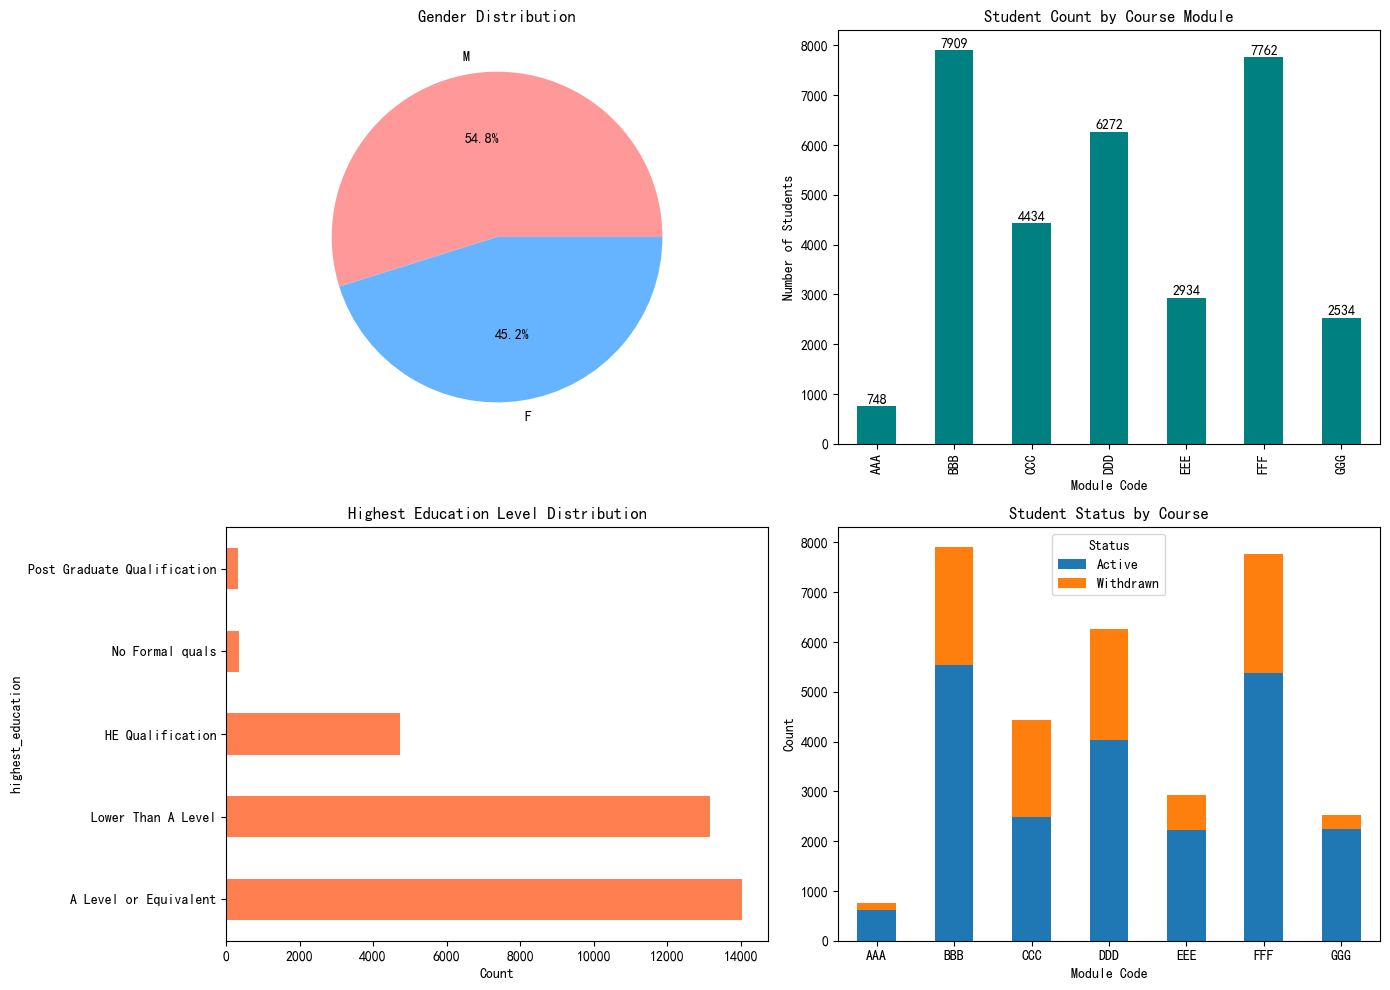

In [25]:
# ============================================================
# 学生基础信息表 (student_info_course_merged) 探索性分析
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示 (如果您的系统支持)
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 1. 加载数据
OUTPUT_PATH = r'c:\Users\Jack\Desktop\GroupWork\Code&Data\Data\processed'
df = pd.read_csv(os.path.join(OUTPUT_PATH, 'student_info_course_merged.csv'))

print("=" * 60)
print("数据集概览")
print("=" * 60)
print(f"数据维度: {df.shape[0]:,} 行 x {df.shape[1]} 列")
print(f"\n列名列表:\n{df.columns.tolist()}")

# 2. 数据类型与缺失值检查
print("\n" + "=" * 60)
print("数据质量检查 (缺失值分析)")
print("=" * 60)
missing_info = pd.DataFrame({
    '缺失数量': df.isnull().sum(),
    '缺失率(%)': (df.isnull().sum() / len(df) * 100).round(2)
})
# 过滤掉没有缺失值的列
missing_info = missing_info[missing_info['缺失数量'] > 0].sort_values(by='缺失率(%)', ascending=False)
if missing_info.empty:
    print("数据非常干净，没有发现缺失值！")
else:
    print(missing_info.to_string())

# 3. 基础统计描述
print("\n" + "=" * 60)
print("数值型变量统计描述")
print("=" * 60)
print(df.describe().to_string())

# 4. 分类变量分布 (核心分析)
print("\n" + "=" * 60)
print("分类变量分布 (核心洞察)")
print("=" * 60)

# 4.1 性别分布
print("\n[4.1] 性别分布:")
gender_counts = df['gender'].value_counts()
print(gender_counts.to_string())
print(f"    -> 男生比例: {(gender_counts.get('M', 0) / len(df) * 100):.2f}%")

# 4.2 学历水平分布
print("\n[4.2] 学历水平 (highest_education) 分布:")
edu_counts = df['highest_education'].value_counts()
print(edu_counts.to_string())

# 4.3 课程模块分布 (最受欢迎的课程)
print("\n[4.3] 课程模块 (code_module) 注册人数:")
module_counts = df['code_module'].value_counts().sort_index()
print(module_counts.to_string())

# 4.4 退学/退修分析
# 注意：退学通常体现在 date_unregistration 不为空
print("\n[4.4] 学生状态分析 (基于注册日期):")
# 假设 date_unregistration 为空表示仍在学或有始无终
still_studying = df['date_unregistration'].isnull().sum()
withdrawn = df['date_unregistration'].notnull().sum()
total = len(df)
print(f"    - 仍在学/未退学: {still_studying:,} ({still_studying/total*100:.2f}%)")
print(f"    - 已退学/退修:   {withdrawn:,} ({withdrawn/total*100:.2f}%)")

# 如果退学数据存在，分析退学率与课程的关系
if withdrawn > 0:
    print("\n[4.5] 各课程的退学率 (Withdrawal Rate):")
    withdrawal_rate = df.groupby('code_module').apply(
        lambda x: (x['date_unregistration'].notnull().sum() / len(x) * 100)
    ).sort_values(ascending=False)
    for module, rate in withdrawal_rate.items():
        print(f"    - 课程 {module}: 退学率 {rate:.2f}%")

# 5. 可视化
print("\n" + "=" * 60)
print("正在生成可视化图表...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 图1: 性别分布
ax1 = axes[0, 0]
gender_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
ax1.set_title('Gender Distribution')
ax1.set_ylabel('')

# 图2: 课程注册人数
ax2 = axes[0, 1]
module_counts.plot(kind='bar', ax=ax2, color='teal')
ax2.set_title('Student Count by Course Module')
ax2.set_xlabel('Module Code')
ax2.set_ylabel('Number of Students')
for i, v in enumerate(module_counts.values):
    ax2.text(i, v + 50, str(v), ha='center')

# 图3: 学历水平分布
ax3 = axes[1, 0]
edu_counts.plot(kind='barh', ax=ax3, color='coral')
ax3.set_title('Highest Education Level Distribution')
ax3.set_xlabel('Count')

# 图4: 退学 vs 未退学 (按课程)
ax4 = axes[1, 1]
df['status'] = df['date_unregistration'].apply(lambda x: 'Withdrawn' if pd.notnull(x) else 'Active')
status_module = pd.crosstab(df['code_module'], df['status'])
status_module.plot(kind='bar', ax=ax4, stacked=True)
ax4.set_title('Student Status by Course')
ax4.set_xlabel('Module Code')
ax4.set_ylabel('Count')
ax4.legend(title='Status')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [33]:
student_info_course.head(10)

,num_of_prev_attempts,studied_credits,final_result,date_registration,module_presentation_length,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,...,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,imd_band_Unknown,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,0,240,2,-159.0,268,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0,60,2,-53.0,268,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,60,0,-92.0,268,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,60,2,-52.0,268,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,60,2,-176.0,268,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,60,2,-110.0,268,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,0,60,2,-67.0,268,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,120,2,-29.0,268,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,0,90,2,-33.0,268,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9,0,60,2,-179.0,268,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [27]:
student_info_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 32593 non-null  object 
 1   code_presentation           32593 non-null  object 
 2   id_student                  32593 non-null  int64  
 3   gender                      32593 non-null  object 
 4   region                      32593 non-null  object 
 5   highest_education           32593 non-null  object 
 6   imd_band                    32593 non-null  object 
 7   age_band                    32593 non-null  object 
 8   num_of_prev_attempts        32593 non-null  int64  
 9   studied_credits             32593 non-null  int64  
 10  disability                  32593 non-null  object 
 11  final_result                32593 non-null  object 
 12  date_registration           32593 non-null  float64
 13  module_presentation_length  325

In [ ]:
print(f"原始数据形状: {student_info_course.shape}")
print(f"原始列: {student_info_course.columns.tolist()}")

# 2. 定义需要独热编码的分类变量 (不包括 final_result)
categorical_cols = [
    'code_module', 
    'code_presentation', 
    'gender', 
    'region', 
    'highest_education', 
    'imd_band', 
    'age_band', 
    'disability'
]

# 3. 对 final_result 进行数值编码 (0, 1, 2, 3)
# 逻辑：退学(0) < 不及格(1) < 及格(2) < 优秀(3)
final_result_mapping = {
    'Withdrawn': 0,
    'Fail': 1,
    'Pass': 2,
    'Distinction': 3
}

# 检查是否存在映射中未定义的类别
unknown_results = student_info_course[~student_info_course['final_result'].isin(final_result_mapping.keys())]['final_result'].unique()
if len(unknown_results) > 0:
    print(f"\n警告: 发现未知的 final_result 类型: {unknown_results}")
else:
    print("\nfinal_result 编码映射:")
    print(final_result_mapping)

student_info_course['final_result'] = df['final_result'].map(final_result_mapping)

# 4. 执行独热编码
student_info_course = pd.get_dummies(student_info_course, columns=categorical_cols, dtype=int)

print(f"\n处理后数据形状: {student_info_course.shape}")
print(f"处理后列名 (前20个): {student_info_course.columns.tolist()}...")

原始数据形状: (32593, 14)
原始列: ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'date_registration', 'module_presentation_length']

final_result 编码映射:
{'Withdrawn': 0, 'Fail': 1, 'Pass': 2, 'Distinction': 3}

处理后数据形状: (32593, 53)
处理后列名 (前20个): ['id_student', 'num_of_prev_attempts', 'studied_credits', 'final_result', 'date_registration', 'module_presentation_length', 'code_module_AAA', 'code_module_BBB', 'code_module_CCC', 'code_module_DDD', 'code_module_EEE', 'code_module_FFF', 'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J', 'code_presentation_2014B', 'code_presentation_2014J', 'gender_F', 'gender_M', 'region_East Anglian Region', 'region_East Midlands Region', 'region_Ireland', 'region_London Region', 'region_North Region', 'region_North Western Region', 'region_Scotland', 'region_South East Region', 'region_South Region', 'regi

In [29]:
student_info_course.shape

(32593, 53)